In [1]:
import numpy as np
from numpy import cos, sin
import matplotlib.pyplot as plt

In [2]:
def show_shape(*shapes, dpi=130):
    fig = plt.figure(dpi=dpi)
    ncols = len(shapes)
    i = 1
    for shape in shapes:
        ax = fig.add_subplot(1, ncols, i)
        i += 1
        ax.set_aspect('equal')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.grid(True)
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.fill(shape[0], shape[1], facecolor='mediumaquamarine')


In [3]:
SHEAR = np.array([[1, 1],
                  [0, 1]])

In [4]:
s = 2
SCALE = np.array([[s, 0],
                  [0, s]])

In [5]:
theta = (90 / 180) * np.pi

ROTATION = np.array([[cos(theta), -sin(theta)],
                     [sin(theta), cos(theta)]])

In [6]:
rectangle = np.array([[0, 0, 2, 2], 
                      [0, 1, 1, 0]])

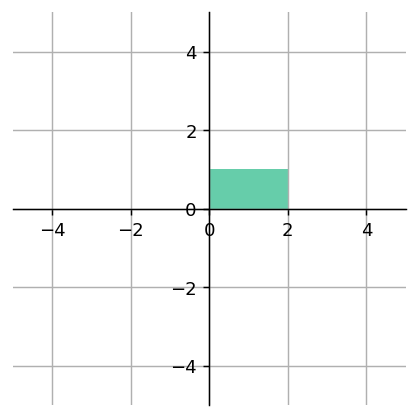

In [7]:
show_shape(rectangle)

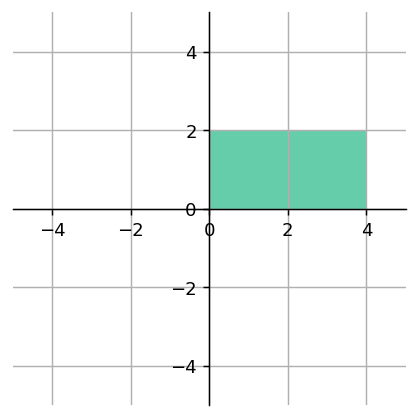

In [8]:
show_shape(SCALE @ rectangle)

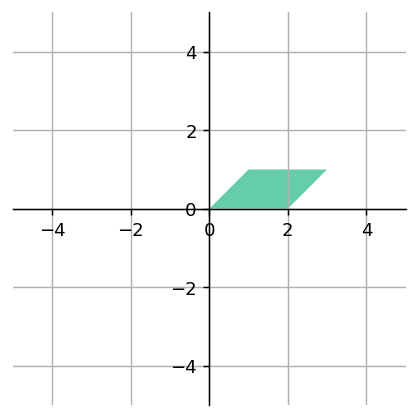

In [9]:
show_shape(SHEAR @ rectangle)

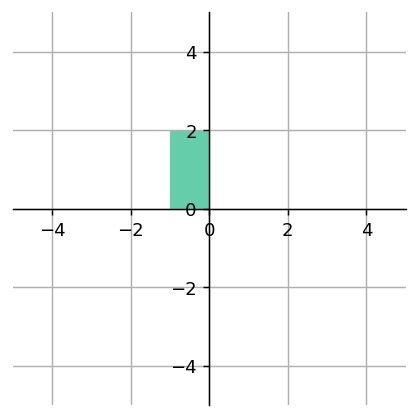

In [10]:
show_shape(ROTATION @ rectangle)

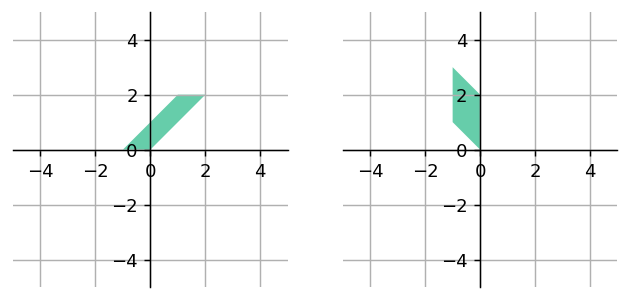

In [11]:
show_shape(SHEAR @ ROTATION @ rectangle, ROTATION @ SHEAR @ rectangle)

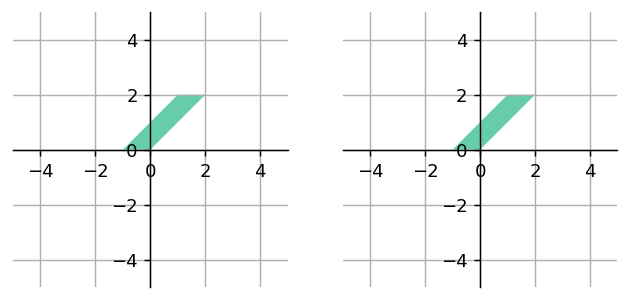

In [12]:
new_shape_0 = (SHEAR @ ROTATION) @ rectangle
new_shape_1 = SHEAR @ (ROTATION @ rectangle)

show_shape(new_shape_0, new_shape_1)

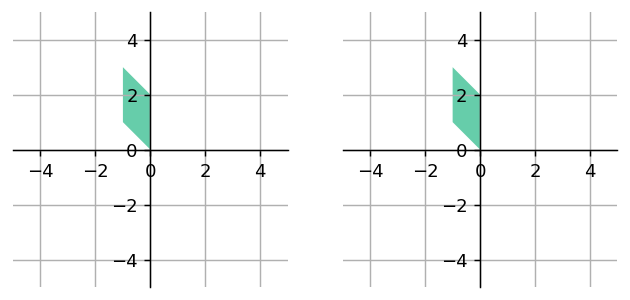

In [13]:
new_shape_3 = (ROTATION @ SHEAR) @ rectangle
new_shape_4 = ROTATION @ (SHEAR @ rectangle)

show_shape(new_shape_3, new_shape_4)

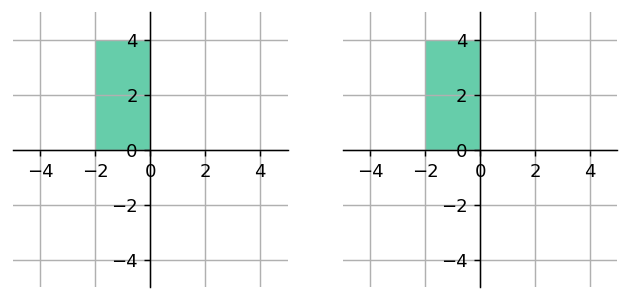

In [14]:
new_shape_5 = ROTATION @ SCALE @ rectangle
new_shape_6 = SCALE @ ROTATION @ rectangle

show_shape(new_shape_5, new_shape_6)